<h1> 20156025 Sungho Park</h1>

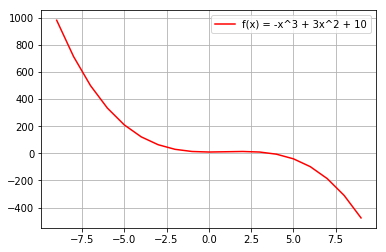

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt  

domain = 20
domain_x = np.zeros(domain,dtype = 'int')
for i in range(domain):
    domain_x[i] = i - (domain / 2 - 1)

def f(x):
    return (-x**3) + (3*x**2) + 10

x = [a for a in range(int(-1*(domain/2) + 1),int(domain/2))]
y = [f(b) for b in range(int(-1*(domain/2) + 1),int(domain/2))]

plt.plot(x,y,'r',label = 'f(x) = -x^3 + 3x^2 + 10')

plt.grid()
plt.legend()

plt.show()

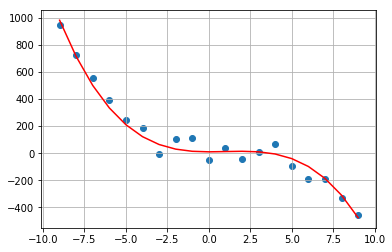

In [2]:
point = np.zeros((domain-1, 2),dtype = 'float')     #임의의점(x,y) domain 개
noise = 100

def random_noise(point):
    for i in range(len(point)):
        r = random.randrange(-1 * noise, noise)
        point[i][0] = domain_x[i]
        point[i][1] = f(i-int(domain / 2 - 1)) + r
            
random_noise(point)

plt.plot(x,y,'r')
plt.scatter(point[:,0],point[:,1])
plt.grid()
plt.legend()
plt.show()

In [3]:
residual = np.zeros((domain-1),dtype = 'float')

for i in range(len(residual)):
    residual[i] = (point[i][1] - f(domain_x[i]))**2

In [4]:
def modelling(degree,A,b):
        for i in range(len(point)):
            for j in range(degree + 1):
                A[i][j] = point[i][0]**j
            b[i] = point[i][1]
            
def output(x, degree, coefficient):
    result = 0
    for i in range(degree + 1):
        result += float(coefficient[i]) * (x ** i)
    #result = float(coefficient[0]) + float(coefficient[1]) * x + float(coefficient[2]) * x**2
    return result

def approximating_polynomial(degree):
    A = np.zeros((len(point), degree + 1), dtype = 'float') #least squar를 하기위한 A 행렬
    b = np.zeros((len(point),1), dtype = 'float')           #least squar를 하기위한 b 행렬
    
    modelling(degree, A, b)
    
    #print(A)
    #print(b)
    
    coefficient = np.zeros((degree + 1,1),dtype = 'float')    #coefficient = Inv(A.T * A) * A.T * b

    #sudo inverse
    coefficient = inv(np.matrix(A.T) * np.matrix(A)) * np.matrix(A.T) * np.matrix(b)
    
    print(coefficient)
    
    x2 = [a for a in range(int(-1*(domain/2) + 1),int(domain/2))]
    y2 = [output(z, degree, coefficient) for z in range(int(-1*(domain/2) + 1),int(domain/2))]

    plt.plot(x2,y2,'g',label = 'approximating polynomial curve')
    plt.plot(x,y,'r', label = 'f(x) = 3x^2 + 2')
    plt.scatter(point[:,0],point[:,1])

    plt.grid()
    plt.legend()

    plt.show()


<h3>degree = 1</h3>

[[ 106.47368421]
 [ -56.50175439]]


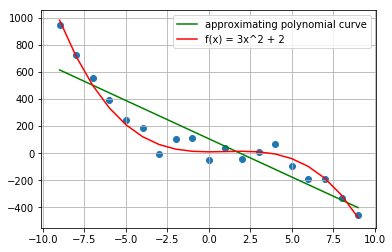

In [9]:
approximating_polynomial(1)

<h3>degree = 2</h3>

[[ 23.2406015 ]
 [-56.50175439]
 [  2.77443609]]


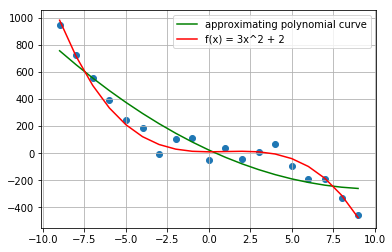

In [10]:
approximating_polynomial(2)

<h3>degree = 3</h3>

[[ 23.2406015 ]
 [-11.00994856]
 [  2.77443609]
 [ -0.8455726 ]]


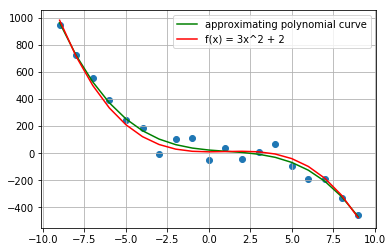

In [12]:
approximating_polynomial(3)

<h3>degree = 4</h3>

[[  2.14758379e+01]
 [ -1.10099486e+01]
 [  2.97312054e+00]
 [ -8.45572599e-01]
 [ -2.59960964e-03]]


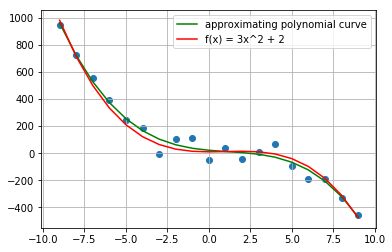

In [13]:
approximating_polynomial(4)